Importing libraries 

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

Dataset

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

In [ ]:
#we dont need a validation dataset for generating text
tokenizer = Tokenizer()

#stored as a single string
data = open('/tmp/irish-lyrics-eof.txt').read()

#number of sentences by splitting the string
corpus = data.lower().split("\n")

#fit tokenizer in text to get word index
tokenizer.fit_on_texts(corpus)

#add 1 to the length of word indexfor vocabulary index to 
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

In [ ]:
#turn them into training data as we've a list of tokenized sentences

#create list of empty input sequences
input_sequences = []
for line in corpus:
	#for each line of corpus we'll create list of tokens
	token_list = tokenizer.texts_to_sequences([line])[0]

#n_gram_sequences is basically a list of broken down sequences from the original sentence
#like the 1st two , 1st three and so on , we are doing this so the model is trained well
#so when we see these two words this one is next, 
#"   "	  "  "    "    threee words "  "  "  " ans so on 

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
	
# pad sequences 
#start by getting length of the longest sentences, 
#pad everything with a 0 upto length max sent
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

#we want y to be categorical & one hot encoded 
#so when we train, we'll be able to predict all words in our corpus
#which one is the  most likely sequence to next in the sequnece
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:

print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

In [ ]:
print(xs[6])
print(ys[6])

In [ ]:
print(xs[5])
print(ys[5])

In [ ]:
print(tokenizer.word_index)

In [9]:
model = Sequential()
#1st parameter: unique words in the corpus, dimension 100
#input length : because looped off the final value in each sequence to make label
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))

#made simple LSTM and made it bidirectional
model.add(Bidirectional(LSTM(150)))

#output is dense with total no. pf words ,
#labels one hot encoded so output representative of this
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)

#defining loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


377/377 [==============================] - 32s 75ms/step - loss: 6.6451 - accuracy: 0.0728
Epoch 2/100
377/377 [==============================] - 28s 73ms/step - loss: 5.8027 - accuracy: 0.1123
Epoch 3/100
377/377 [==============================] - 27s 73ms/step - loss: 4.9032 - accuracy: 0.1625
Epoch 4/100
377/377 [==============================] - 27s 72ms/step - loss: 3.9564 - accuracy: 0.2367
Epoch 5/100
377/377 [==============================] - 27s 72ms/step - loss: 3.1151 - accuracy: 0.3385
Epoch 6/100
377/377 [==============================] - 29s 76ms/step - loss: 2.4580 - accuracy: 0.4471
Epoch 7/100
377/377 [==============================] - 27s 73ms/step - loss: 2.0129 - accuracy: 0.5252
Epoch 8/100
377/377 [==============================] - 27s 73ms/step - loss: 1.6545 - accuracy: 0.6060
Epoch 9/100
377/377 [==============================] - 27s 73ms/step - loss: 1.3744 - accuracy: 0.6704
Epoch 10/100
377/377 [==============================] - 27s 72ms/step - loss: 1.1812 

In [10]:
import matplotlib.pyplot as plt

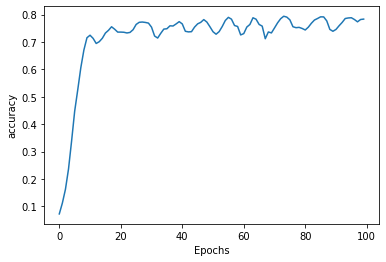

In [11]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')


In [12]:
#to generate text, seed it with some text & predict next values
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 19ms/step
I've got a bad feeling about this crown leave in morning some little stile but in ould faces and the divils and all at divinity high road in rising childer are reel on the road to drumslieve crystal march with faces drawn to fill to me grief said love you tis trod so shining near oer the prime of green and the green down by a river when we safely landed that were gone and the covers buttoned down by my own fireside are on their way i wid you love my own low so dearly so dearly watch and hope and pray an equality then that
